<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Market_Return_by_Dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

15:20:13 Starting...
15:20:13 Installing yfinance into Google notebook...
15:20:16 Installing arch into Google notebook...
15:20:24 Initialized.


## Get the Data

In [2]:
data,ticker_name=download(ticker:='SPY',end='2019-12-31',auto_adjust=True).xs(ticker,axis=1,level=1),'S&P 500 Index ETF'
data['Return']=data['Close'].pct_change()*hundred
data.columns.name=ticker_name
data.dropna(inplace=True)
data.index=list(map(lambda x:pd.Period(x,'D'),data.index))
data['Weekday']=list(map(lambda x:x.strftime("%A"),data.index))
data['Monthday']=data.index.day
data['DaysInMonth']=list(map(lambda x:pd.Period(x,'M').daysinmonth,data.index))
data['Month']=list(map(lambda x:x.strftime("%B"),data.index))
display(data)

[*********************100%***********************]  1 of 1 completed


S&P 500 Index ETF,Close,High,Low,Open,Volume,Return,Weekday,Monthday,DaysInMonth,Month
1993-02-01,24.626438,24.626438,24.469914,24.469914,480500,0.711255,Monday,1,28,February
1993-02-02,24.678614,24.696005,24.556873,24.609047,201300,0.211868,Tuesday,2,28,February
1993-02-03,24.939482,24.956873,24.696000,24.713392,529400,1.057061,Wednesday,3,28,February
1993-02-04,25.043835,25.096009,24.748178,25.026443,531500,0.418425,Thursday,4,28,February
1993-02-05,25.026440,25.078614,24.887307,25.026440,492100,-0.069458,Friday,5,28,February
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,296.917694,297.315155,296.769796,297.259697,52990000,0.152750,Monday,23,31,December
2019-12-24,296.926880,297.194919,296.621831,297.148713,20270000,0.003094,Tuesday,24,31,December
2019-12-26,298.507599,298.516851,297.305963,297.315187,30911200,0.532360,Thursday,26,31,December
2019-12-27,298.433655,299.302540,297.897548,299.247082,42528800,-0.024771,Friday,27,31,December


15:20:28 Wrote plot to Daily Returns of S&P 500 Index ETF.png.


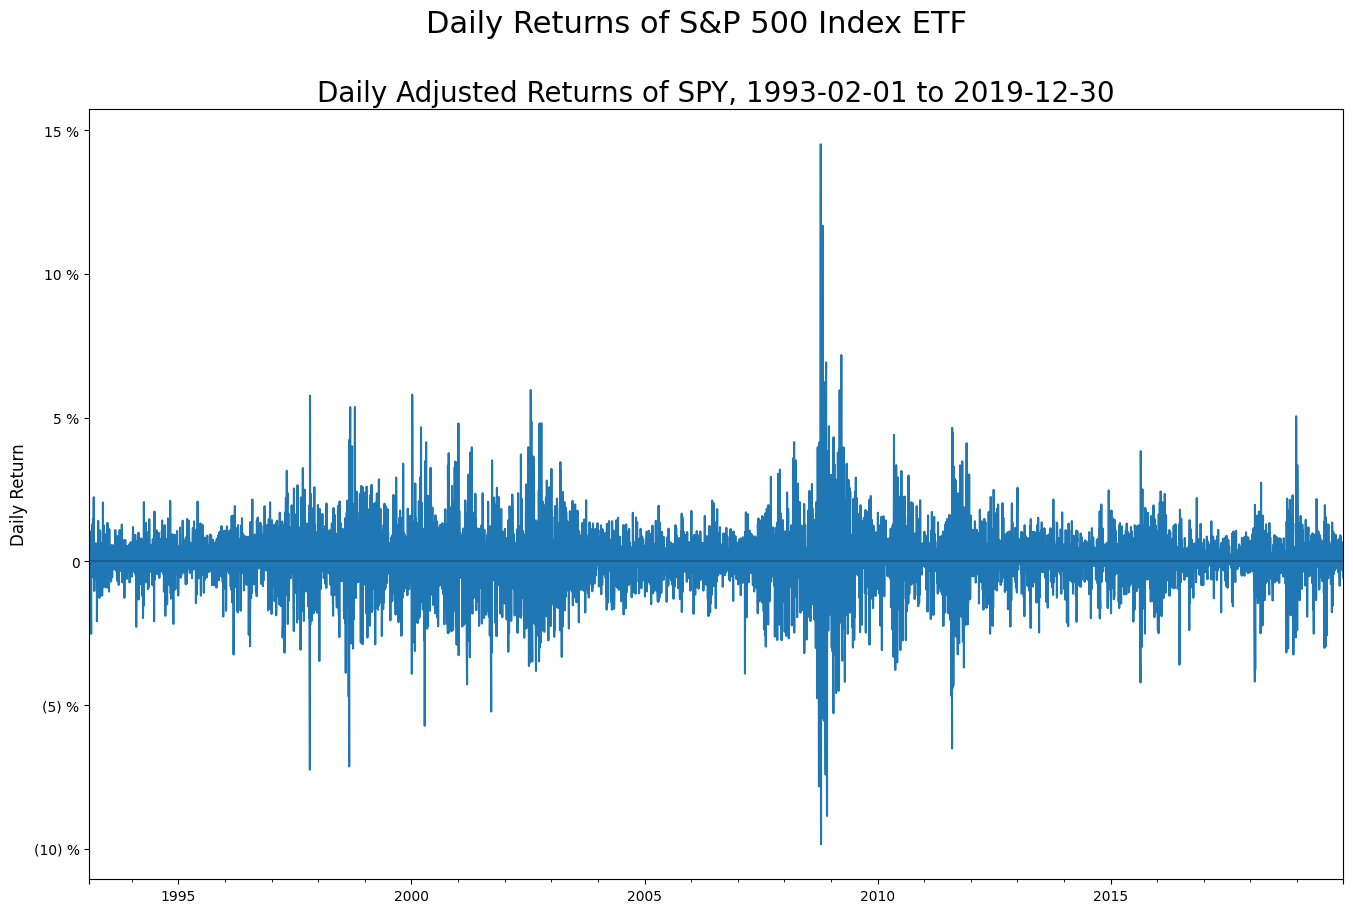

In [3]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
data['Return'].plot(ax=plot)
plot.set_ylabel("Daily Return",fontsize=12)
plot.yaxis.set_major_formatter(PercentLabels(0))
figure.suptitle(title:="Daily Returns of {}".format(ticker_name),fontsize=22)
plot.set_title(subtitle:="Daily Adjusted Returns of {}, {} to {}".format(ticker,data.index[0],data.index[-1]),fontsize=20)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
plot.axhline(color='black',alpha=0.2)
nprint("Wrote plot to {}.".format(filename))

## Analyse Returns by Day of the Week
### First Just a Simple Grouped Mean

15:20:29 t Test for a Zero Mean


S&P 500 Index ETF,Mean,Std.Dev.,Count,Std.Err.,t Statistic,p Value
Day of Week,,,,,,
Monday,0.040137,1.264921,1277,0.035397,1.133912,0.257045
Tuesday,0.071447,1.159079,1389,0.031100,2.297326,0.021748
Wednesday,0.051836,1.095636,1390,0.029387,1.763887,0.077971
Thursday,0.023568,1.126049,1364,0.030489,0.772996,0.439659
Friday,0.028855,1.064546,1358,0.028888,0.998862,0.318040


15:20:31 Wrote plot to Average Returns of S&P 500 Index ETF by Day of the Week.png.


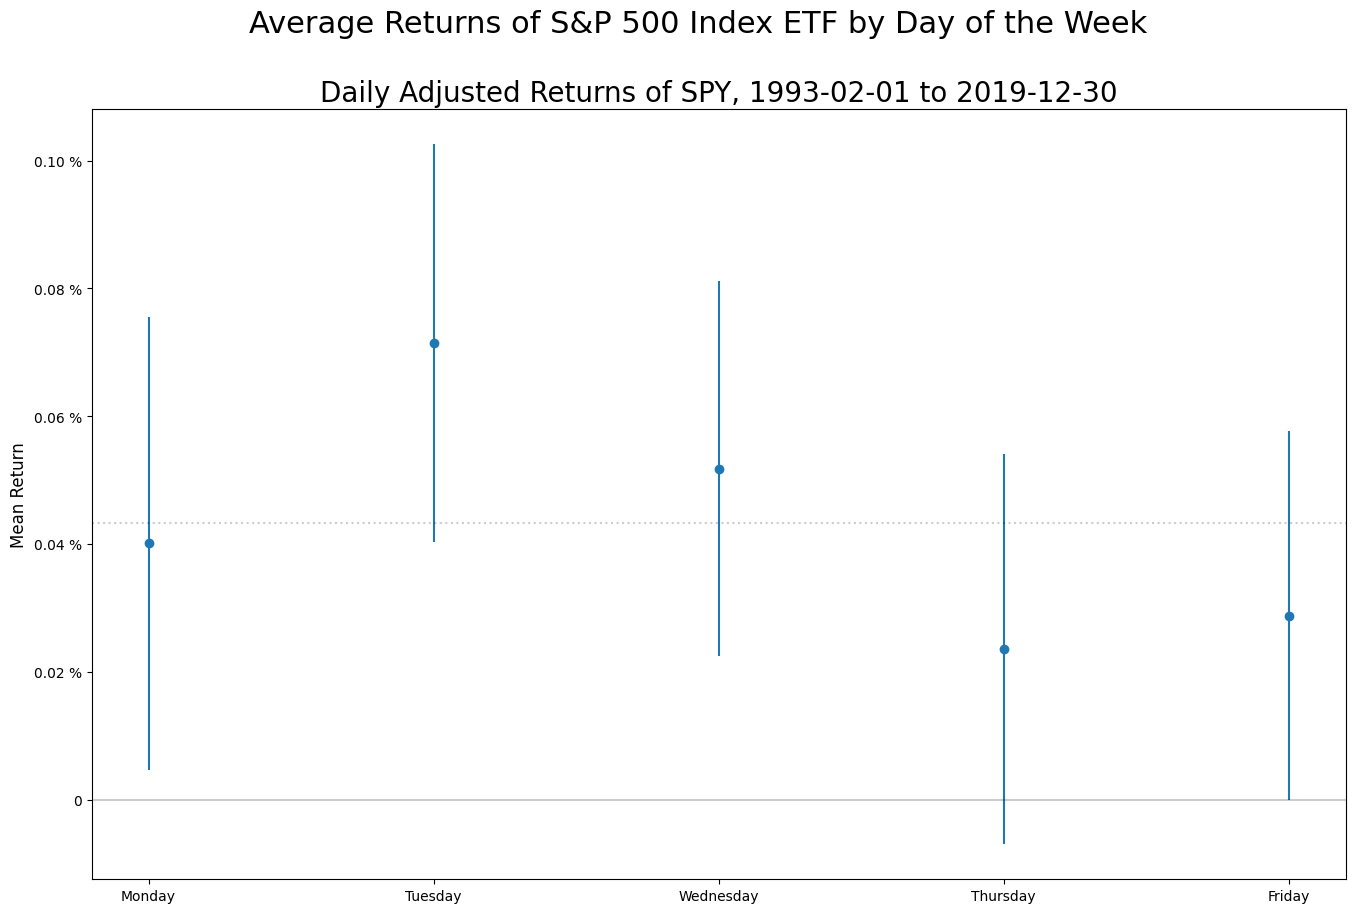

In [4]:
from scipy.stats import t as studentt

nprint("t Test for a Zero Mean")
results=(grouped:=data[['Return','Weekday']].groupby("Weekday")).mean().rename(columns={'Return':'Mean'})
results['Std.Dev.']=grouped.std()
results['Count']=grouped.count()
results['Std.Err.']=results['Std.Dev.']/np.sqrt(results['Count'])
results['t Statistic']=results['Mean']/results['Std.Err.']
results['p Value']=studentt.sf(np.abs(results['t Statistic']),results['Count']-1)*2
results.index.name='Day of Week'
results=results.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday'])
display(results)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x:=results.index,y:=results['Mean'],ye:=results['Std.Err.'],fmt='o')
plot.axhline(color='black',alpha=0.2)
plot.set_ylabel("Mean Return",fontsize=12)
plot.yaxis.set_major_formatter(PercentLabels(2))
plot.axhline(data['Return'].mean(),color='black',alpha=0.2,linestyle=':')
figure.suptitle(title:="Average Returns of {} by {}".format(ticker_name,group_name:="Day of the Week"),fontsize=22)
plot.set_title(subtitle:="Daily Adjusted Returns of {}, {} to {}".format(ticker,data.index[0],data.index[-1]),fontsize=20)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote plot to {}.".format(filename))

### One Way ANOVA Analysis

In [5]:
from statsmodels.formula.api import ols as OLSformula
from statsmodels.stats.anova import anova_lm

nprint("One Way ANOVA Analysis by {}".format(group_name))
fit=OLSformula("Return ~ Weekday",data).fit()
anova=anova_lm(fit,typ=2).rename(columns={'sum_sq':'Sum of Squares','df':'d.o.f.','PR(>F)':'p Value','F':'F Statistic'})
anova['Significance']=anova['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova.index=['Between Groups','Within Groups']
anova.index.name='Variation'
display(anova.replace(np.nan,""))

15:20:33 One Way ANOVA Analysis by Day of the Week


,Sum of Squares,d.o.f.,F Statistic,p Value,Significance
Variation,,,,,
Between Groups,2.028898,4.0,0.388631,0.816932,
Within Groups,8839.839458,6773.0,,,


### Now do an OLS with Indicator Variables
This will deliver *exactly* the same results as the grouped means, but with some other statistics for "free."

In [6]:
from statsmodels.regression.linear_model import OLS

nprint("Baseline OLS regression with indicator variables. This should produce *exactly* the same results as the conditional means above.")
display(design:=pd.get_dummies(data['Weekday'],columns=['Weekday'],dtype=float)[results.index].merge(data['Return'],left_index=True,right_index=True))
fit=ols_fit=OLS(design['Return'],design.drop('Return',axis=1)).fit()
nprint(fit.summary())

15:20:33 Baseline OLS regression with indicator variables. This should produce *exactly* the same results as the conditional means above.


,Monday,Tuesday,Wednesday,Thursday,Friday,Return
1993-02-01,1.0,0.0,0.0,0.0,0.0,0.711255
1993-02-02,0.0,1.0,0.0,0.0,0.0,0.211868
1993-02-03,0.0,0.0,1.0,0.0,0.0,1.057061
1993-02-04,0.0,0.0,0.0,1.0,0.0,0.418425
1993-02-05,0.0,0.0,0.0,0.0,1.0,-0.069458
...,...,...,...,...,...,...
2019-12-23,1.0,0.0,0.0,0.0,0.0,0.152750
2019-12-24,0.0,1.0,0.0,0.0,0.0,0.003094
2019-12-26,0.0,0.0,0.0,1.0,0.0,0.532360
2019-12-27,0.0,0.0,0.0,0.0,1.0,-0.024771


15:20:33                             OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3886
Date:                Thu, 17 Apr 2025   Prob (F-statistic):              0.817
Time:                        15:20:33   Log-Likelihood:                -10518.
No. Observations:                6778   AIC:                         2.105e+04
Df Residuals:                    6773   BIC:                         2.108e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Monday         0.0401      0.032      1.255

### Now fit a GJR-GARCH(1,1,1) Model with the Same Dummies and Non-Normal Innovations
This is a _way more accurate_ distributional model that the Normal model assumed by OLS. It will weight high-volatility days appropriately.

15:20:33 Fitting GJR-GARCH(1,1,1) Model with GED Innovations
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8757.537379905443
            Iterations: 19
            Function evaluations: 265
            Gradient evaluations: 19
15:20:35                               AR-X - GJR-GARCH Model Results                              
Dep. Variable:                             Return   R-squared:                       0.003
Mean Model:                                  AR-X   Adj. R-squared:                  0.002
Vol Model:                              GJR-GARCH   Log-Likelihood:               -8757.54
Distribution:      Generalized Error Distribution   AIC:                           17537.1
Method:                        Maximum Likelihood   BIC:                           17612.1
                                                    No. Observations:                 6777
Date:                            Thu, Apr 17 2025   Df Residuals:                  

,Estimate,Std.Err.,Null Value,t Score,p Value
Return[1],-0.037679,0.011730,0.0,-3.212352,0.001317
Monday,0.060162,0.017614,0.0,3.415567,0.000636
Tuesday,0.043873,0.022271,0.0,1.969992,0.048839
Wednesday,0.081092,0.016771,0.0,4.835203,0.000001
Thursday,0.047723,0.022653,0.0,2.106672,0.035146
Friday,0.076803,0.018143,0.0,4.233113,0.000023
omega,0.017319,0.003150,,,
alpha[1],0.000360,0.006655,,,
gamma[1],0.188309,0.022785,,,
beta[1],0.888261,0.012040,,,


15:20:37 Wrote plot to Effect of Volatilty on Estimated Returns of S&P 500 Index ETF by Day of the Week.png.


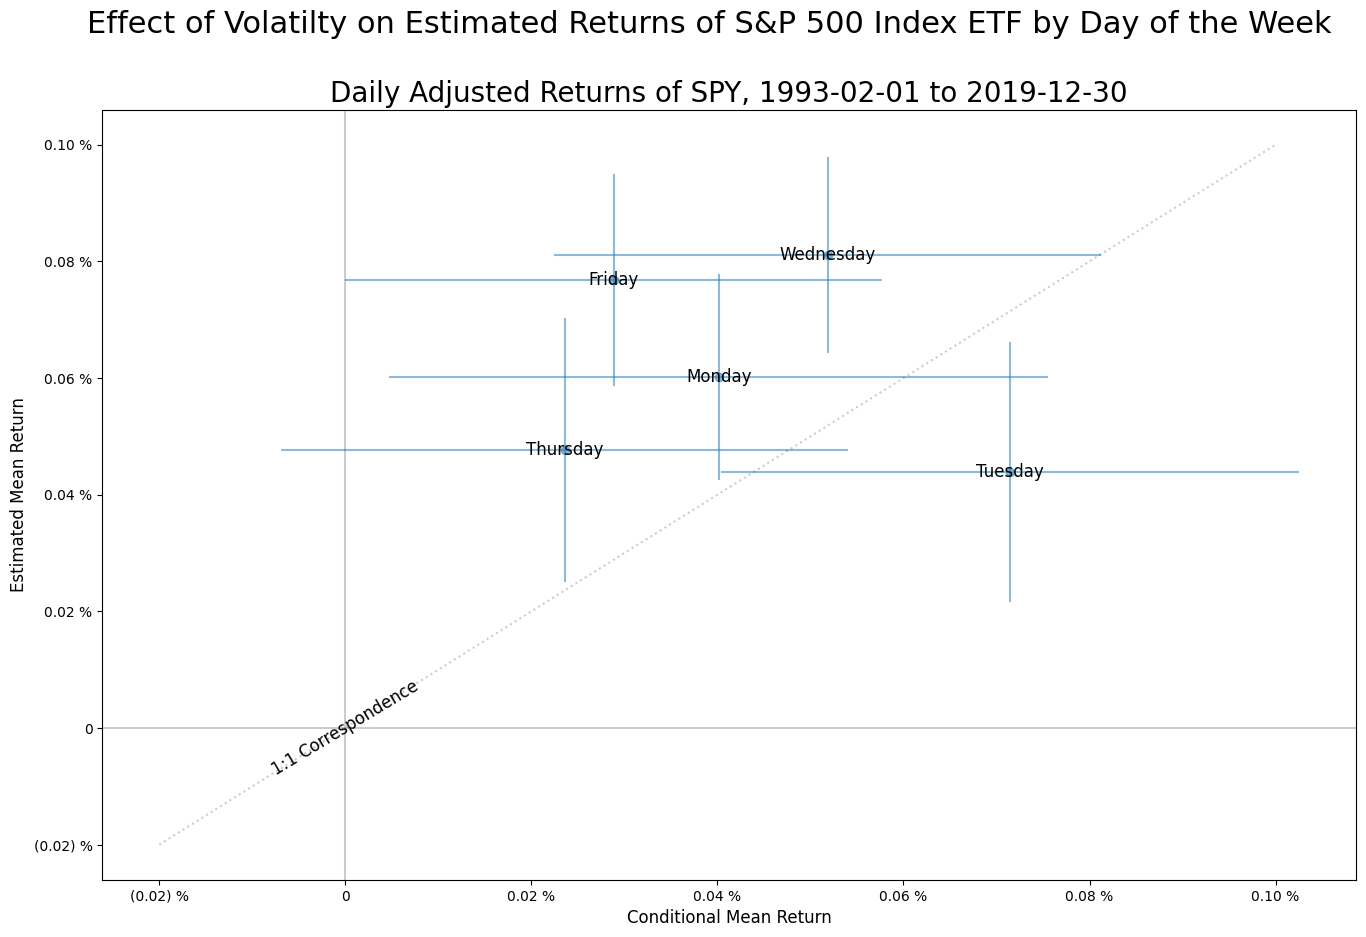

In [7]:
from scipy.stats import norm

nprint("Fitting GJR-GARCH(1,1,1) Model with GED Innovations")
model=ARX(design["Return"],design.drop('Return',axis=1),constant=False,lags=1)
model.volatility=GARCH2(1,1,1)
model.distribution=GeneralizedError2()
fit=gjr_fit=model.fit(update_freq=0)
nprint(gjr_fit.summary())
data['Volatility']=gjr_fit.conditional_volatility

results=pd.DataFrame({'Estimate':fit.params,'Std.Err.':fit.std_err,'Null Value':[zero]*(len(fit.params)-5)+[np.nan]*4+[two]})
results['t Score']=(results['Estimate']-results['Null Value'])/results['Std.Err.']
results['p Value']=list(map(lambda x:min(norm.cdf(x),norm.sf(x))*two,results['t Score']))
display(results.replace(np.nan,""))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(xx:=y,yy:=results.loc[x,'Estimate'],xerr=ye,yerr=results.loc[x,'Std.Err.'],fmt='o',alpha=0.5)

for day in x:
  plot.text(xx.loc[day],yy.loc[day],day,ha='center',va='center',fontsize=12)

plot.plot(r:=[min([-0.02,xx.min(),yy.min()]),max([0.1,xx.max(),yy.max()])],r,':',color='black',alpha=0.2)
plot.text(zero,zero,'1:1 Correspondence',fontsize=12,ha='center',va='center',rotation=31)
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
plot.set_xlabel("Conditional Mean Return",fontsize=12)
plot.set_ylabel("Estimated Mean Return",fontsize=12)
plot.xaxis.set_major_formatter(PercentLabels(2))
plot.yaxis.set_major_formatter(PercentLabels(2))
figure.suptitle(title:="Effect of Volatilty on Estimated Returns of {} by {}".format(ticker_name,group_name:="Day of the Week"),fontsize=22)
plot.set_title(subtitle:="Daily Adjusted Returns of {}, {} to {}".format(ticker,data.index[0],data.index[-1]),fontsize=20)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote plot to {}.".format(filename))

### Repeat the Simple Plot by Day of Week

15:20:39 Wrote plot to Estimated Mean Returns of S&P 500 Index ETF by Day of the Week.png.


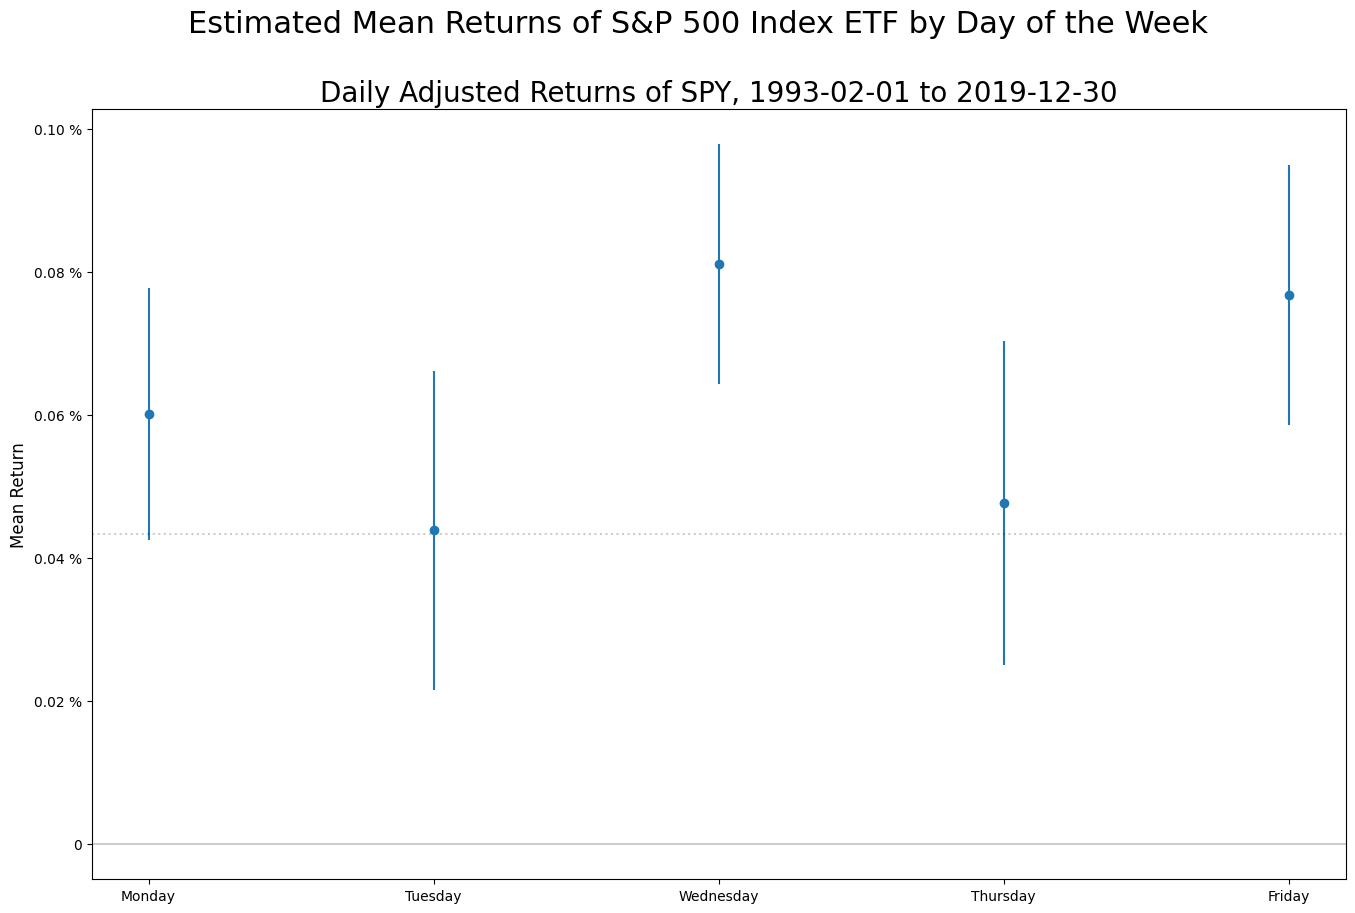

In [8]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x,results.loc[x,'Estimate'],results.loc[x,'Std.Err.'],fmt='o')
plot.axhline(color='black',alpha=0.2)
plot.set_ylabel("Mean Return",fontsize=12)
plot.yaxis.set_major_formatter(PercentLabels(2))
plot.axhline(data['Return'].mean(),color='black',alpha=0.2,linestyle=':')
figure.suptitle(title:="Estimated Mean Returns of {} by {}".format(ticker_name,group_name),fontsize=22)
plot.set_title(subtitle:="Daily Adjusted Returns of {}, {} to {}".format(ticker,data.index[0],data.index[-1]),fontsize=20)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote plot to {}.".format(filename))

## Now Look at Calendar Months
### First Compute the Simple Grouped Means Again

15:20:39 t Test for a Zero Mean


S&P 500 Index ETF,Mean,Std.Dev.,Count,Std.Err.,t Statistic,p Value
Month,,,,,,
January,0.038049,1.121078,531,0.048651,0.782089,0.434511
February,0.015454,1.022404,518,0.044922,0.344017,0.730974
March,0.071041,1.149215,591,0.047272,1.502798,0.133426
April,0.094163,1.033274,557,0.043781,2.150757,0.031926
May,0.033056,0.969624,572,0.040542,0.815357,0.415208
June,0.010261,0.950364,577,0.039564,0.259344,0.795463
July,0.043392,1.011231,570,0.042356,1.024474,0.306047
August,-0.012832,1.161861,599,0.047472,-0.270304,0.787020
September,0.003635,1.208788,547,0.051684,0.070329,0.943957


15:20:42 Wrote plot to Average Returns of S&P 500 Index ETF by Month.png.
15:20:42 One Way ANOVA Analysis by Month


,Sum of Squares,d.o.f.,F Statistic,p Value,Significance
Variation,,,,,
Between Groups,2.028898,4.0,0.388631,0.816932,
Within Groups,8839.839458,6773.0,,,


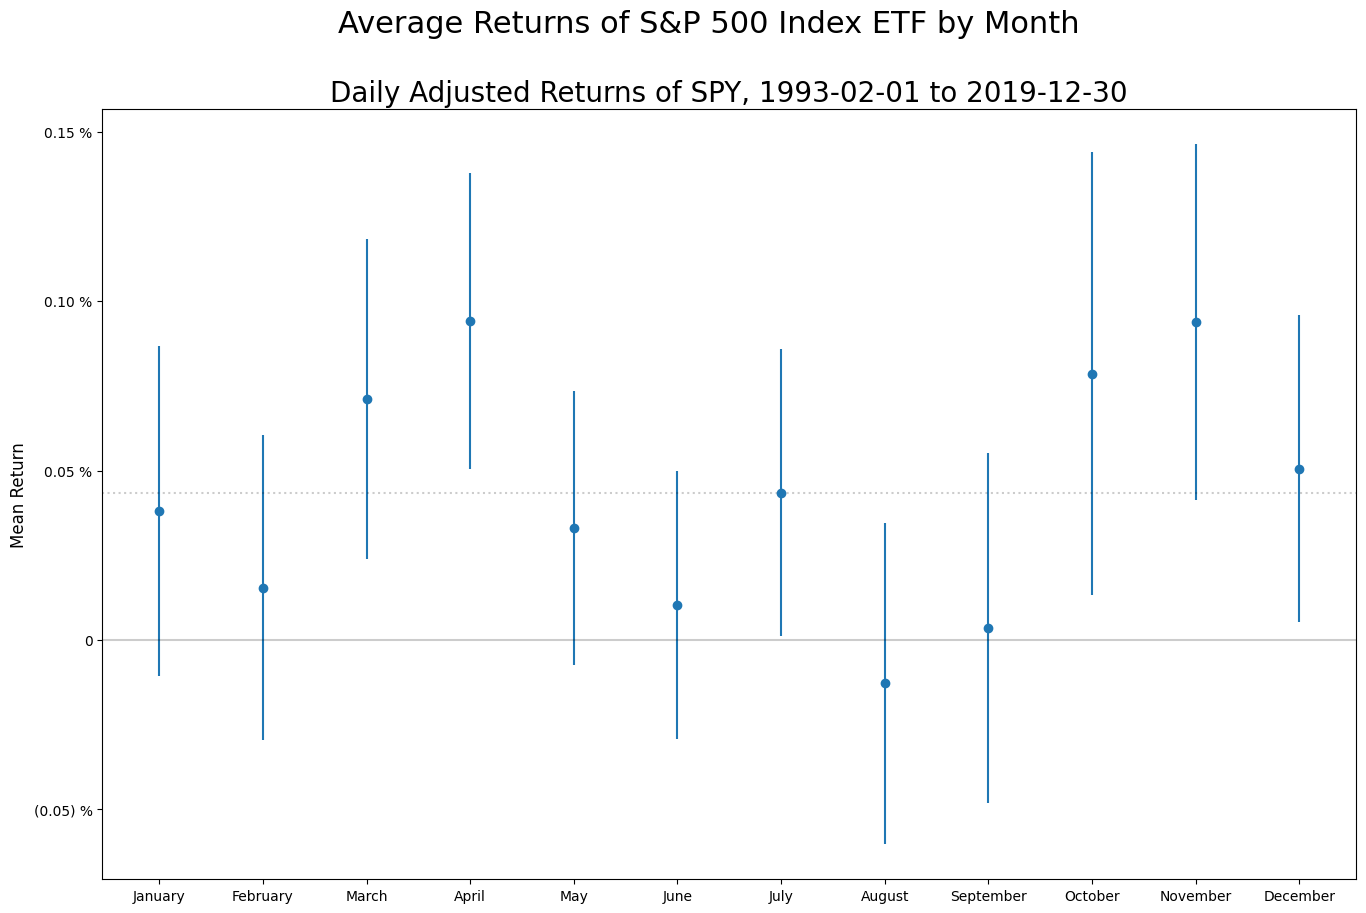

In [9]:
nprint("t Test for a Zero Mean")
results=(grouped:=data[['Return',group_name:='Month']].groupby(group_name)).mean().rename(columns={'Return':'Mean'})
results['Std.Dev.']=grouped.std()
results['Count']=grouped.count()
results['Std.Err.']=results['Std.Dev.']/np.sqrt(results['Count'])
results['t Statistic']=results['Mean']/results['Std.Err.']
results['p Value']=studentt.sf(np.abs(results['t Statistic']),results['Count']-1)*2
results.index.name=group_name
results=results.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
display(results)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x:=results.index,y:=results['Mean'],ye:=results['Std.Err.'],fmt='o')
plot.axhline(color='black',alpha=0.2)
plot.set_ylabel("Mean Return",fontsize=12)
plot.yaxis.set_major_formatter(PercentLabels(2))
plot.axhline(data['Return'].mean(),color='black',alpha=0.2,linestyle=':')
figure.suptitle(title:="Average Returns of {} by {}".format(ticker_name,group_name),fontsize=22)
plot.set_title(subtitle:="Daily Adjusted Returns of {}, {} to {}".format(ticker,data.index[0],data.index[-1]),fontsize=20)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote plot to {}.".format(filename))

nprint("One Way ANOVA Analysis by {}".format(group_name))
fit=OLSformula("Return ~ Weekday",data).fit()
anova=anova_lm(fit,typ=2).rename(columns={'sum_sq':'Sum of Squares','df':'d.o.f.','PR(>F)':'p Value','F':'F Statistic'})
anova['Significance']=anova['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova.index=['Between Groups','Within Groups']
anova.index.name='Variation'
display(anova.replace(np.nan,""))

### Then the OLS with Indicator Variables

In [10]:
nprint("Baseline OLS regression with indicator variables. This should produce *exactly* the same results as the conditional means above.")
display(design:=pd.get_dummies(data['Month'],columns=['Month'],dtype=float)[results.index].merge(data['Return'],left_index=True,right_index=True))
fit=ols_fit=OLS(design['Return'],design.drop('Return',axis=1)).fit()
nprint(fit.summary())

15:20:42 Baseline OLS regression with indicator variables. This should produce *exactly* the same results as the conditional means above.


,January,February,March,April,May,June,July,August,September,October,November,December,Return
1993-02-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.711255
1993-02-02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211868
1993-02-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.057061
1993-02-04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418425
1993-02-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.069458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.152750
2019-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003094
2019-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.532360
2019-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.024771


15:20:43                             OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5523
Date:                Thu, 17 Apr 2025   Prob (F-statistic):              0.868
Time:                        15:20:43   Log-Likelihood:                -10515.
No. Observations:                6778   AIC:                         2.105e+04
Df Residuals:                    6766   BIC:                         2.114e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
January        0.0380      0.050      0.767

### Finally fit the GJR-GARCH(1,1,1) Model

15:20:43 Fitting GJR-GARCH(1,1,1) Model with GED Innovations
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8753.028359293216
            Iterations: 29
            Function evaluations: 608
            Gradient evaluations: 29
15:20:44                               AR-X - GJR-GARCH Model Results                              
Dep. Variable:                             Return   R-squared:                       0.003
Mean Model:                                  AR-X   Adj. R-squared:                  0.002
Vol Model:                              GJR-GARCH   Log-Likelihood:               -8753.03
Distribution:      Generalized Error Distribution   AIC:                           17542.1
Method:                        Maximum Likelihood   BIC:                           17664.8
                                                    No. Observations:                 6777
Date:                            Thu, Apr 17 2025   Df Residuals:                  

,Estimate,Std.Err.,Null Value,t Score,p Value
Return[1],-0.039434,0.012859,0.0,-3.066619,0.002165
January,0.105593,0.025589,0.0,4.126574,0.000037
February,0.094188,0.029797,0.0,3.161042,0.001572
March,0.043522,0.029764,0.0,1.462222,0.14368
April,0.079376,0.026400,0.0,3.006707,0.002641
May,0.039563,0.032184,0.0,1.229284,0.218966
June,0.034743,0.030442,0.0,1.141303,0.253744
July,0.052864,0.024606,0.0,2.148403,0.031682
August,0.034012,0.008846,0.0,3.844667,0.000121
September,0.026575,0.030090,0.0,0.883179,0.377139


15:20:46 Wrote plot to Effect of Volatility on Estimated Returns of S&P 500 Index ETF by Month.png.


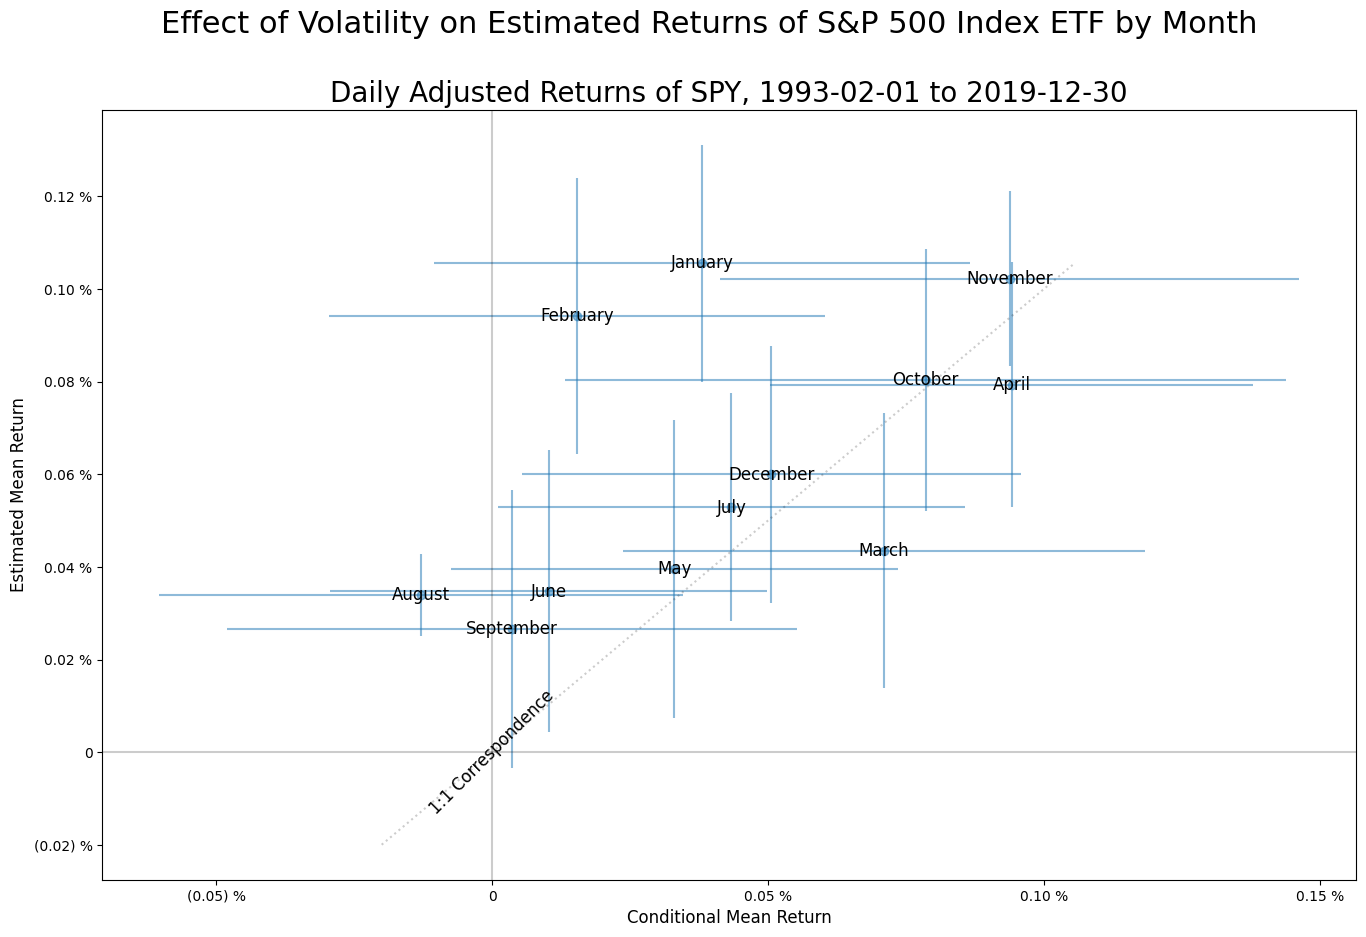

In [11]:
nprint("Fitting GJR-GARCH(1,1,1) Model with GED Innovations")
model=ARX(design["Return"],design.drop('Return',axis=1),constant=False,lags=1)
model.volatility=GARCH2(1,1,1)
model.distribution=GeneralizedError2()
fit=gjr_fit=model.fit(update_freq=0)
nprint(gjr_fit.summary())
data['Volatility']=gjr_fit.conditional_volatility

results=pd.DataFrame({'Estimate':fit.params,'Std.Err.':fit.std_err,'Null Value':[zero]*(len(fit.params)-5)+[np.nan]*4+[two]})
results['t Score']=(results['Estimate']-results['Null Value'])/results['Std.Err.']
results['p Value']=list(map(lambda x:min(norm.cdf(x),norm.sf(x))*two,results['t Score']))
display(results.replace(np.nan,""))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(xx:=y,yy:=results.loc[x,'Estimate'],xerr=ye,yerr=results.loc[x,'Std.Err.'],fmt='o',alpha=0.5)

for day in x:
  plot.text(xx.loc[day],yy.loc[day],day,ha='center',va='center',fontsize=12)

plot.plot(r:=[min([-0.02,xx.min(),yy.min()]),max([0.1,xx.max(),yy.max()])],r,':',color='black',alpha=0.2)
plot.text(zero,zero,'1:1 Correspondence',fontsize=12,ha='center',va='center',rotation=45)
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
plot.set_xlabel("Conditional Mean Return",fontsize=12)
plot.set_ylabel("Estimated Mean Return",fontsize=12)
plot.xaxis.set_major_formatter(PercentLabels(2))
plot.yaxis.set_major_formatter(PercentLabels(2))
figure.suptitle(title:="Effect of Volatility on Estimated Returns of {} by {}".format(ticker_name,group_name),fontsize=22)
plot.set_title(subtitle:="Daily Adjusted Returns of {}, {} to {}".format(ticker,data.index[0],data.index[-1]),fontsize=20)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote plot to {}.".format(filename))

### Repeat the Simple Plot by Month

15:20:47 Wrote plot to Estimated Mean Returns of S&P 500 Index ETF by Month.png.


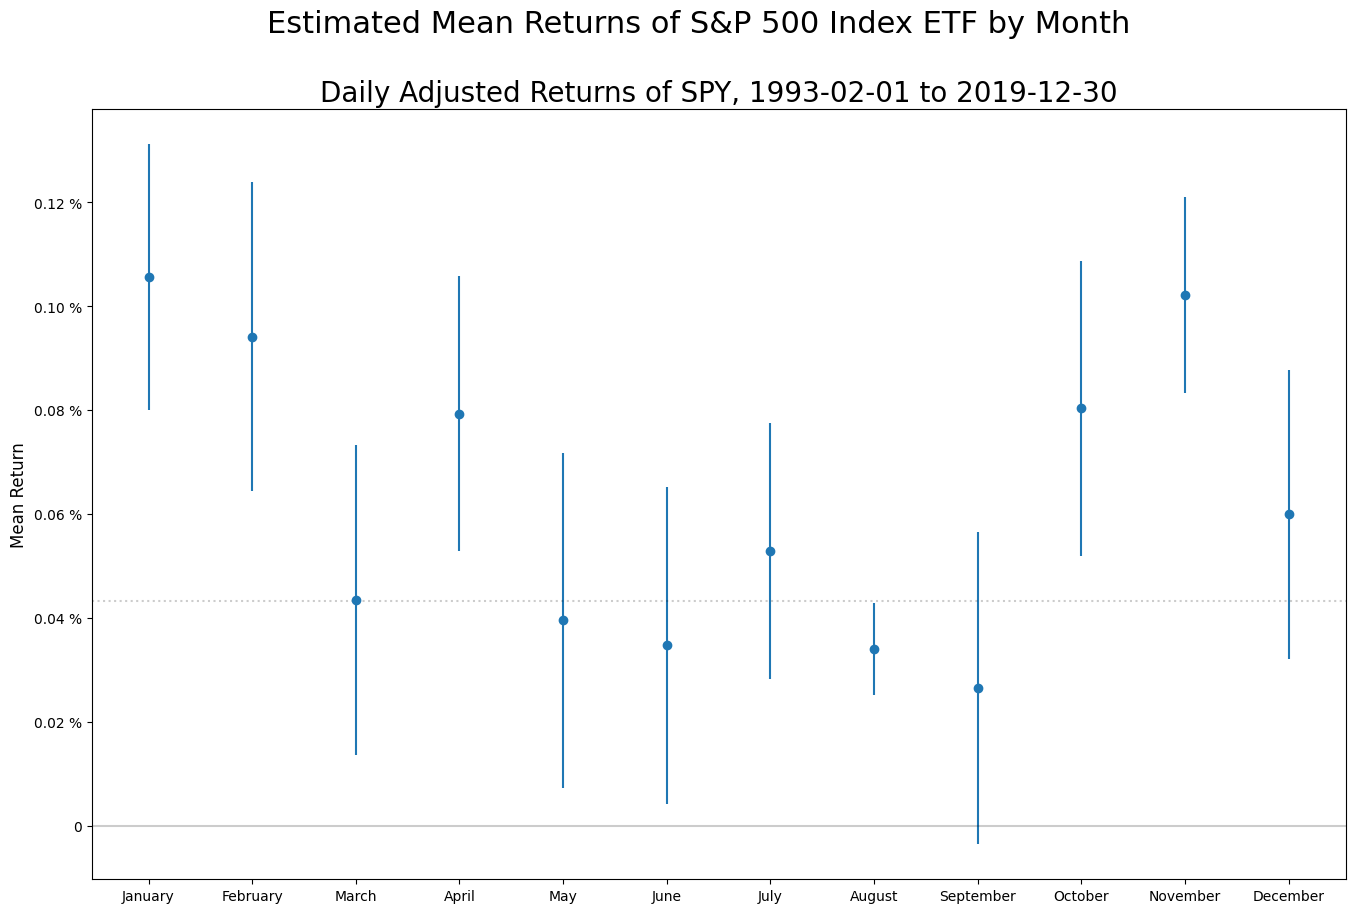

In [12]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x,results.loc[x,'Estimate'],results.loc[x,'Std.Err.'],fmt='o')
plot.axhline(color='black',alpha=0.2)
plot.set_ylabel("Mean Return",fontsize=12)
plot.yaxis.set_major_formatter(PercentLabels(2))
plot.axhline(data['Return'].mean(),color='black',alpha=0.2,linestyle=':')
figure.suptitle(title:="Estimated Mean Returns of {} by {}".format(ticker_name,group_name),fontsize=22)
plot.set_title(subtitle:="Daily Adjusted Returns of {}, {} to {}".format(ticker,data.index[0],data.index[-1]),fontsize=20)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote plot to {}.".format(filename))